In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [172]:
import warnings
warnings.filterwarnings("ignore")

In [174]:
with open('/home/jovyan/work/cold_start_models/item_coldstart_dataset_kp.pkl', 'rb') as f:
    df_kp = pickle.load(f)

In [175]:
df_kp

,age_access_type,country,duration,availability,type,name,release_year,genre,user_count_3months,subscription_only,...,DIRECTOR,EDITOR,OPERATOR,PRODUCER,WRITER,BUDGET,MARKETING,RUS,USA,WORLD
0,12,[usa],6420000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,Звёздный путь 5: Последний рубеж,1989.0,"[Sci-Fi, Action, Thriller, Adventure]",6,False,...,[Уильям Шетнер],[Питер Е. Бергер],[Эндрю Ласло],"[Харви Беннетт, Брук Бретон, Мэл Эфрос, Джин Р...","[Джин Родденберри, Уильям Шетнер, Харви Беннет...",27800000.0,NaN,NaN,52210049.0,52210049.0
1,16,[usa],6780000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,Звёздный путь 6: Неоткрытая страна,1991.0,"[Sci-Fi, Action, Thriller, Adventure]",11,False,...,[Николас Мейер],"[Уильям Хой, Рональд Руз]",[Хиро Нарита],"[Стивен-Чарльз Джаффе, Ральф Уинтер, Брук Брет...","[Джин Родденберри, Леонард Нимой, Лоуренс Конн...",30000000.0,NaN,NaN,74888996.0,96888996.0
2,18,[usa],6000000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,В поисках древнего артефакта,2019.0,[Horror],19,False,...,[Джаред Кон],NaN,NaN,"[Джаред Кон, Майкл Мейландер, Брайан Перера]",[Морис Хёрли],NaN,NaN,NaN,NaN,NaN
3,18,[usa],3780000.0,[SUBSCRIPTION],MOVIE,Прожарка Чарли Шина,2011.0,"[Comedy, Documentary]",1637,True,...,[Джоэл Галлен],NaN,NaN,"[Рик Остин, Марк Бёрг, Роб Кроуфорд, Джоэл Гал...","[Рэй Джеймс, Майкл Ферруччи, Крис МакГуайр, Фр...",NaN,NaN,NaN,NaN,NaN
4,18,[usa],3780000.0,[SUBSCRIPTION],MOVIE,Прожарка Уильяма Шэтнера,2006.0,[Comedy],322,True,...,[Джоэл Галлен],"[Билл ДеРонде, Наруми Инацугу]",NaN,"[Рик Остин, Роб Кроуфорд, Джоэл Галлен, Мишель...","[Майкл Ферруччи, Мэтью Харауиц, Джо Келли, Аар...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10012,0,[france],36300000.0,[SUBSCRIPTION],SERIAL,Эрнест и Селестина,2017.0,"[Family, Cartoons]",1866,True,...,"[Жюльен Шен, Жан-Кристоф Роже]",NaN,NaN,"[Дамиен Брюннер, Дидье Брюннер, Стефан Роэлант...","[Суэна Эро, Аньес Бидо, Мойра Берар, Томоко Ха...",NaN,NaN,NaN,NaN,NaN
10013,16,[ukraine],29040000.0,[SUBSCRIPTION],SERIAL,"Мульт ""Кухня""",2017.0,"[Comedy, Cartoons]",39,True,...,"[Валерия Малкова, Вячеслав Левковский, Дмитрий...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10014,12,[russia],12240000.0,[SUBSCRIPTION],SERIAL,Без памяти,2021.0,"[Comedy, Melodrama]",14958,True,...,[Владимир Котт],NaN,[Андрей Капранов],"[Александр Плотников, Альберт Рябышев, Андрей ...","[Константин Наумочкин, Сергей Соколов, Наталья...",NaN,NaN,NaN,NaN,NaN
10015,16,[south-korea],8400000.0,"[SUBSCRIPTION, AVOD]",SERIAL,Всплеск любви,2015.0,"[Melodrama, Fantasy]",2056,False,...,[Ким Джи-хён],NaN,NaN,NaN,[Ким Джи-хён],NaN,NaN,NaN,NaN,NaN


In [176]:
df_kp.columns

Index(['age_access_type', 'country', 'duration', 'availability', 'type',
       'name', 'release_year', 'genre', 'user_count_3months',
       'subscription_only', 'uid', 'ACTOR', 'COMPOSER', 'DESIGN', 'DIRECTOR',
       'EDITOR', 'OPERATOR', 'PRODUCER', 'WRITER', 'BUDGET', 'MARKETING',
       'RUS', 'USA', 'WORLD'],
      dtype='object')

In [ ]:
origs = ['ee48def6-c311-4b73-a878-1a5d3d1679a3',
        '9b202b16-55bf-418a-b01d-9f0329b18790',
        '49a3d528-44c0-408e-b6fc-a1507ce7641a',
        'a8749d17-85fc-4ccf-ba56-75991c3a9da4',
        '02eaefe0-296d-4e6f-b52f-2e2507d07103'
                ]
df_kp[df_kp['_c0'].isin(origs)]

In [148]:
df_kp.shape

(10017, 24)

In [149]:
df_kp.columns = df_kp.columns.map(str.lower)

# EDA

In [15]:
# Nans
df_kp.isnull().sum()

age_access_type          0
country                  0
duration                 0
availability           129
type                     0
name                     0
release_year             0
genre                    0
user_count_3months       0
subscription_only        0
uid                      0
ACTOR                  201
COMPOSER              1307
DESIGN                1387
DIRECTOR               142
EDITOR                1760
OPERATOR              1384
PRODUCER              1090
WRITER                 328
BUDGET                6874
MARKETING             9768
RUS                   6592
USA                   6560
WORLD                 5031
dtype: int64

## Mutlivalue categorical features

In [16]:
def plot_bar(bar_info, title=''):
    plt.title(title)
    sns.barplot(y=bar_info.values, x=bar_info.index)
    plt.show()

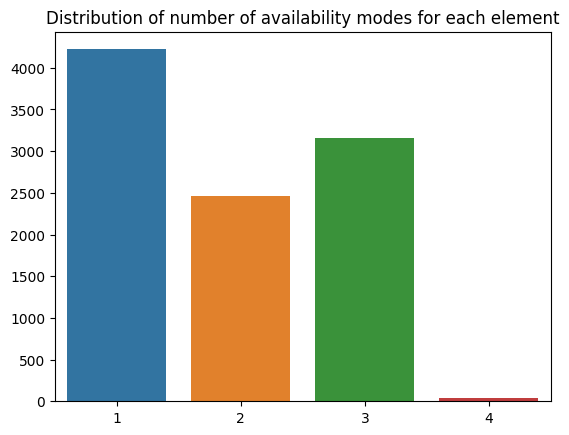

In [18]:
availability_num = pd.Series([len(value) for value in df_kp['availability'].dropna()])
bar_info = availability_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of availability modes for each element')

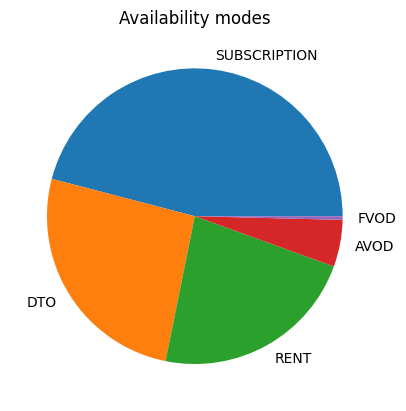

In [19]:
all_avail_modes = []
for element in df_kp['availability'].dropna():
    all_avail_modes.extend(element)
avail_modes_count = pd.Series(all_avail_modes).value_counts()
plt.pie(avail_modes_count.values, labels=avail_modes_count.index)
plt.title('Availability modes')
plt.show()

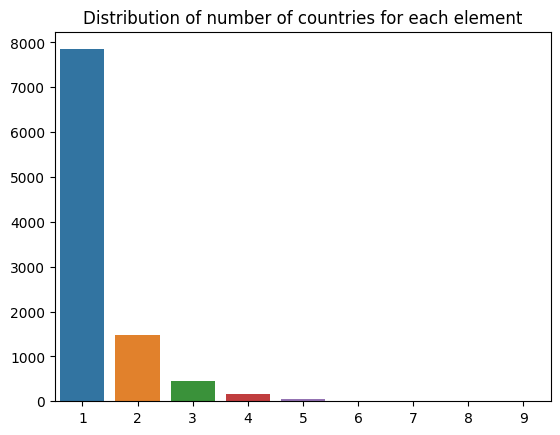

In [20]:
countries_num = pd.Series([len(value) for value in df_kp['country']])
bar_info = countries_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of countries for each element')

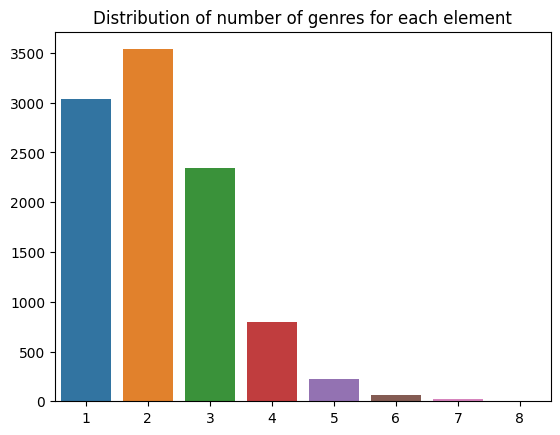

In [21]:
genres_num = pd.Series([len(value) for value in df_kp['genre']])
bar_info = genres_num.value_counts().sort_values()

plot_bar(bar_info, 'Distribution of number of genres for each element')

In [28]:
genres_count = []

for g in df_kp['genre']:
    genres_count.extend(g)

list(pd.Series(genres_count).value_counts()[:10].index)

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Melodrama',
 'Adventure',
 'Cartoons',
 'Crime',
 'Family',
 'Sci-Fi']

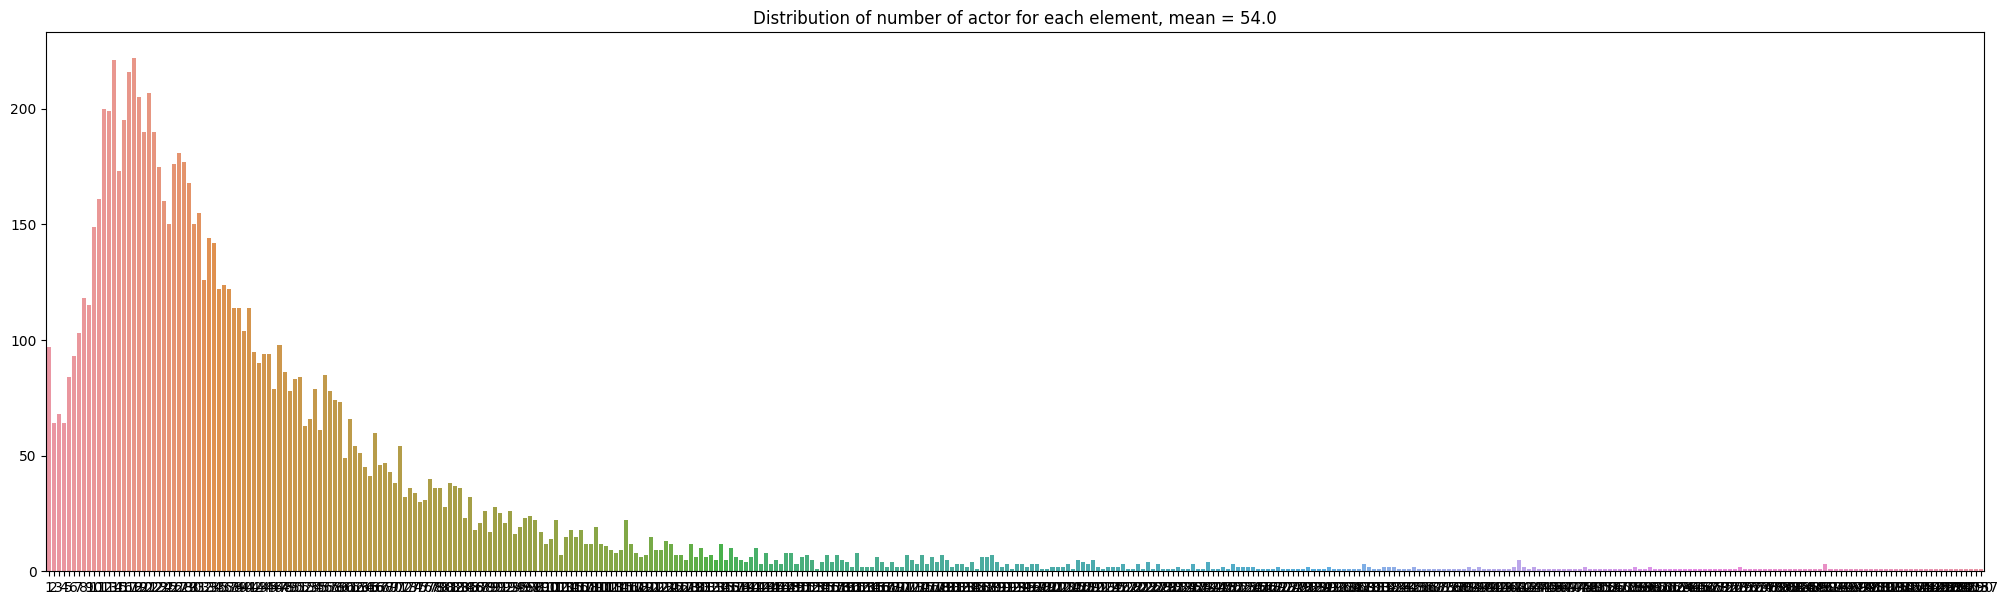

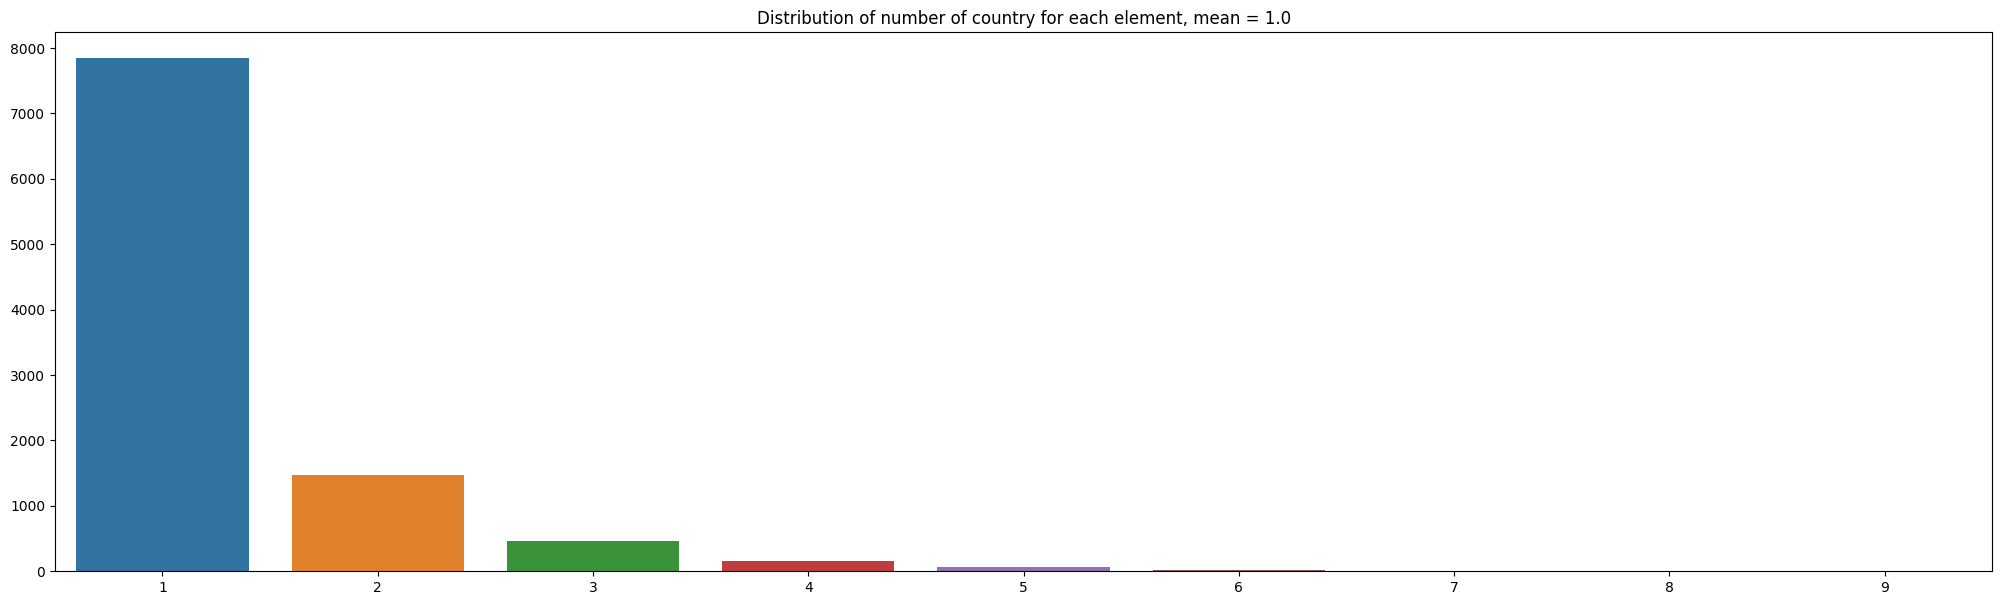

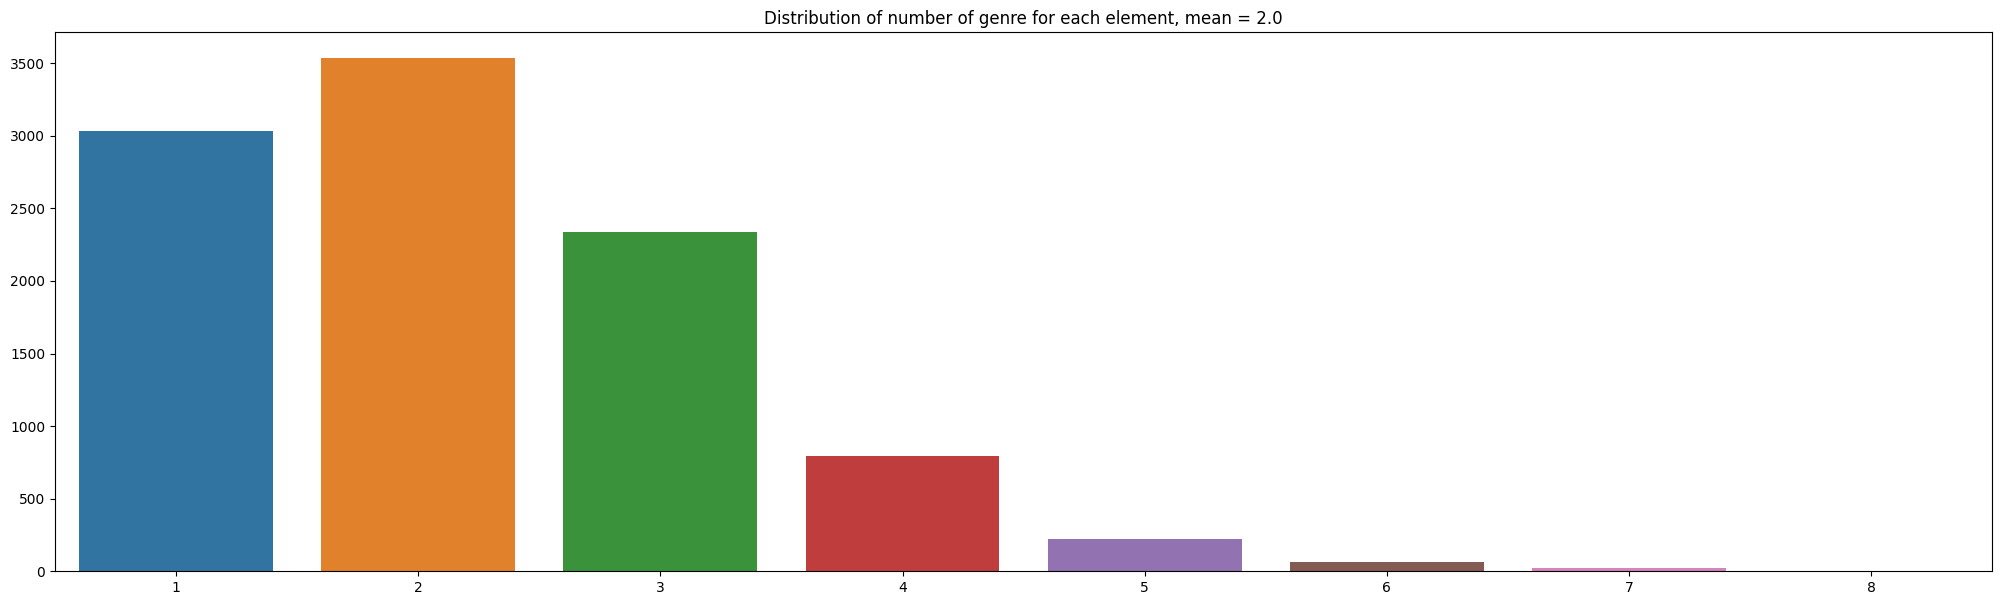

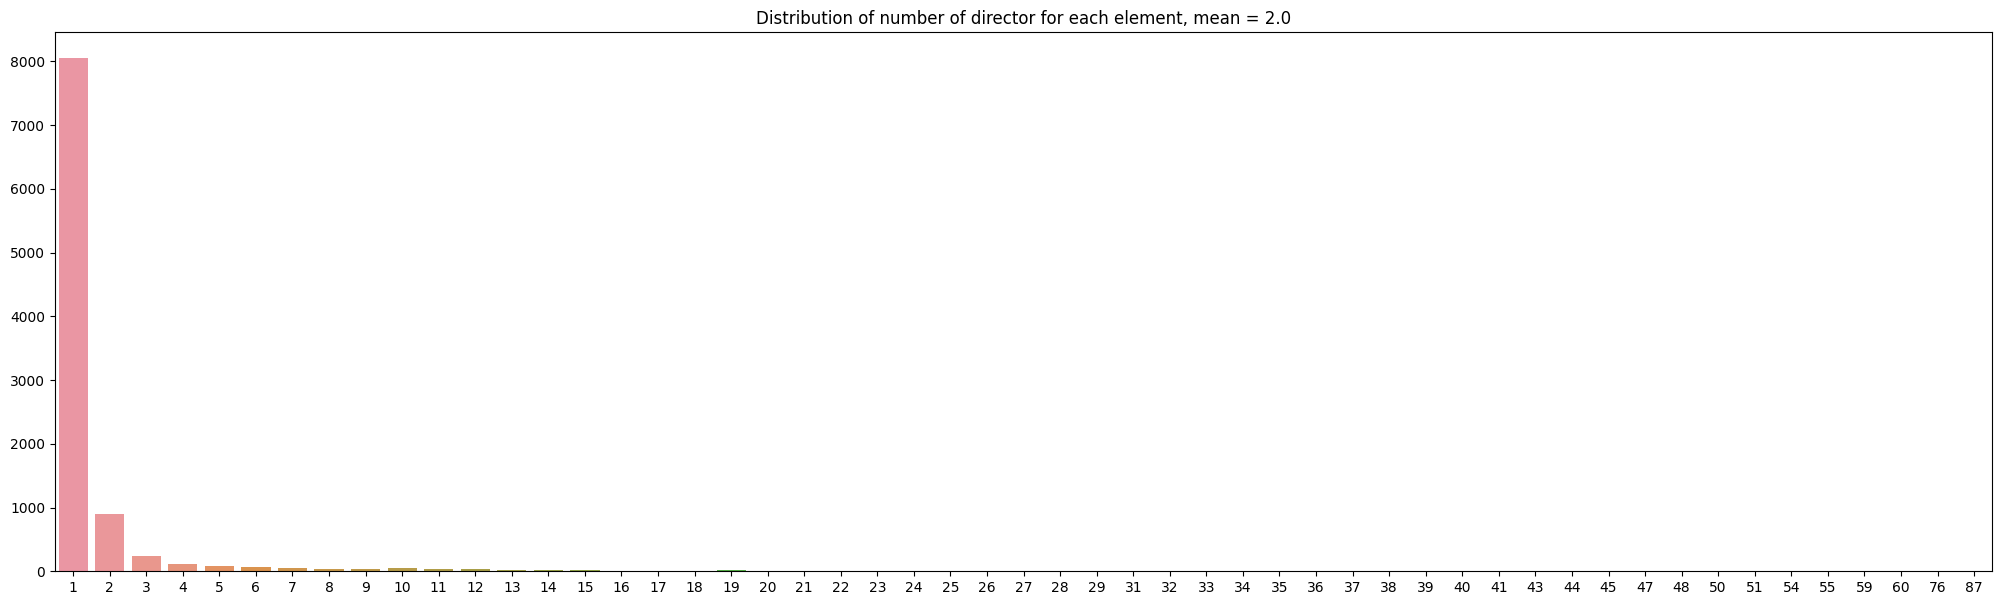

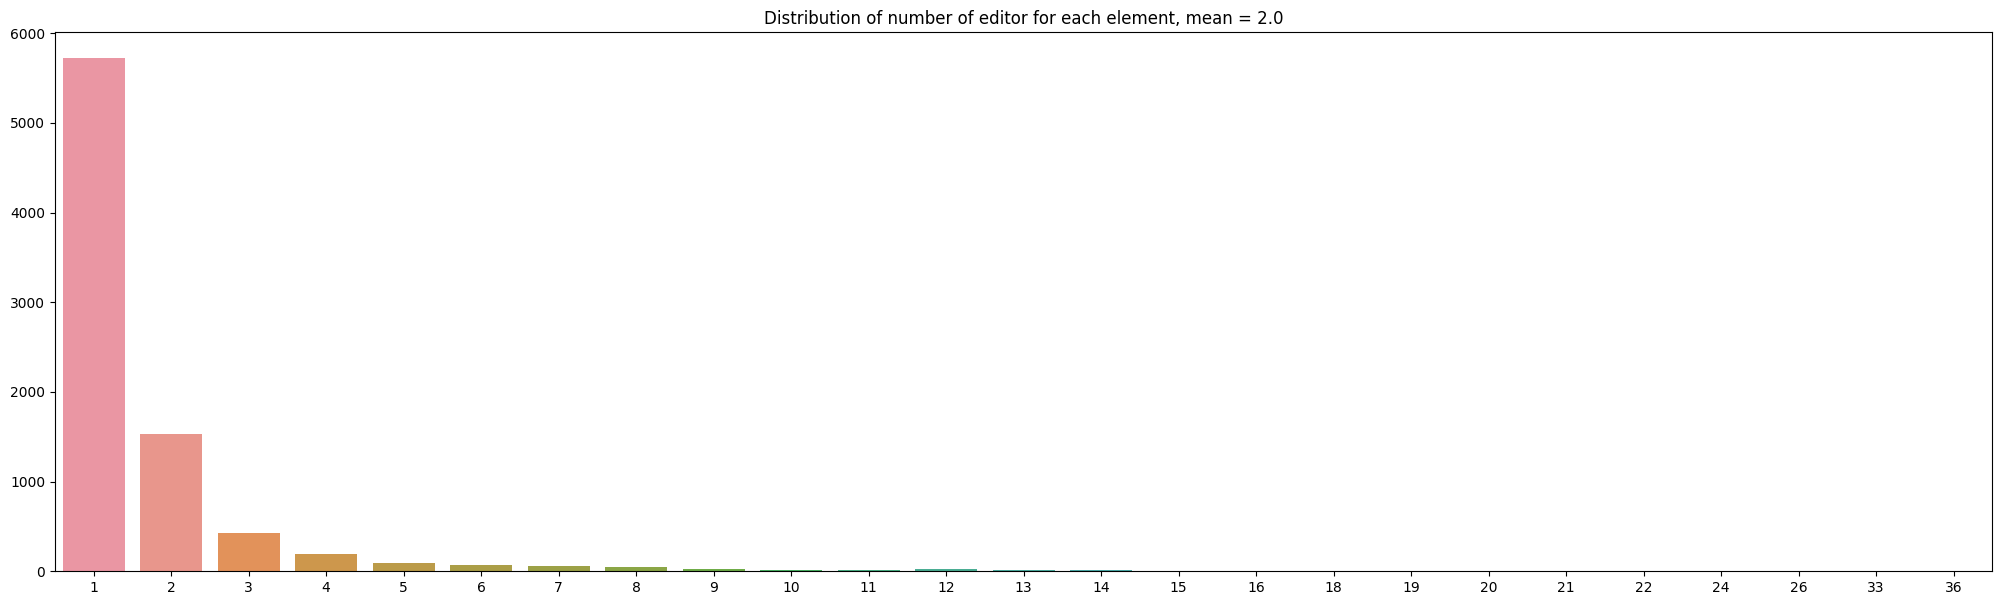

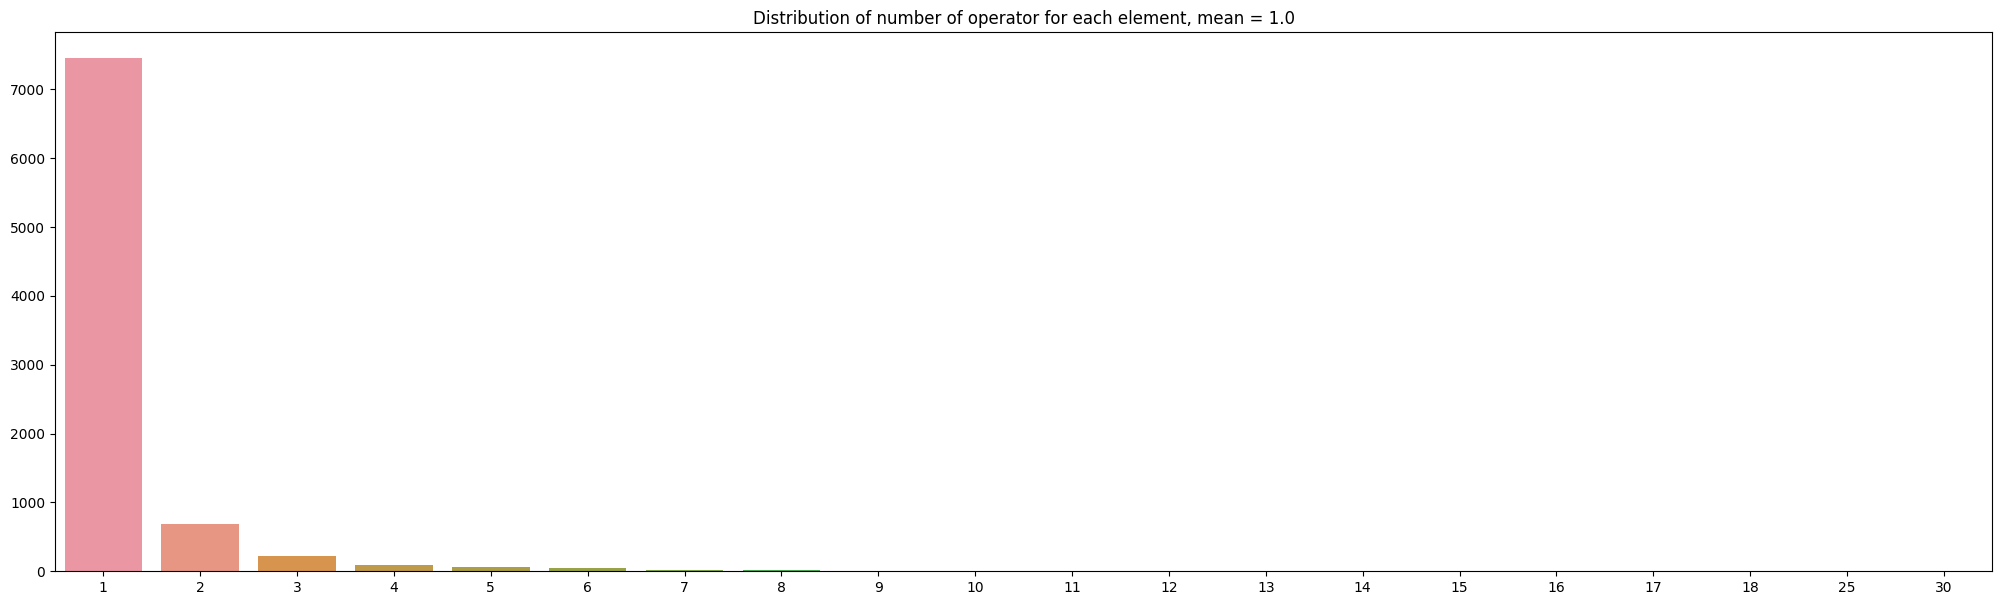

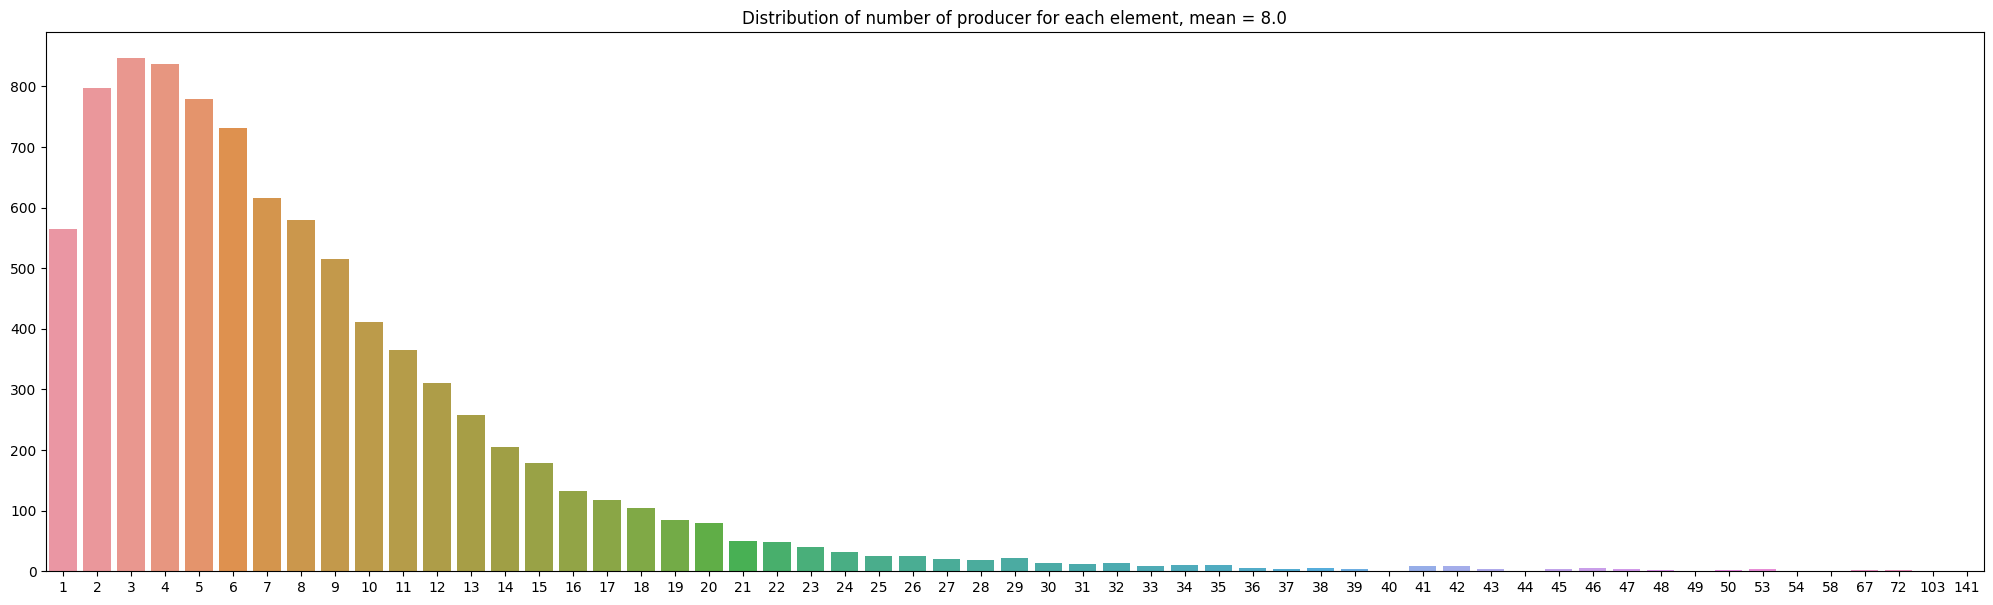

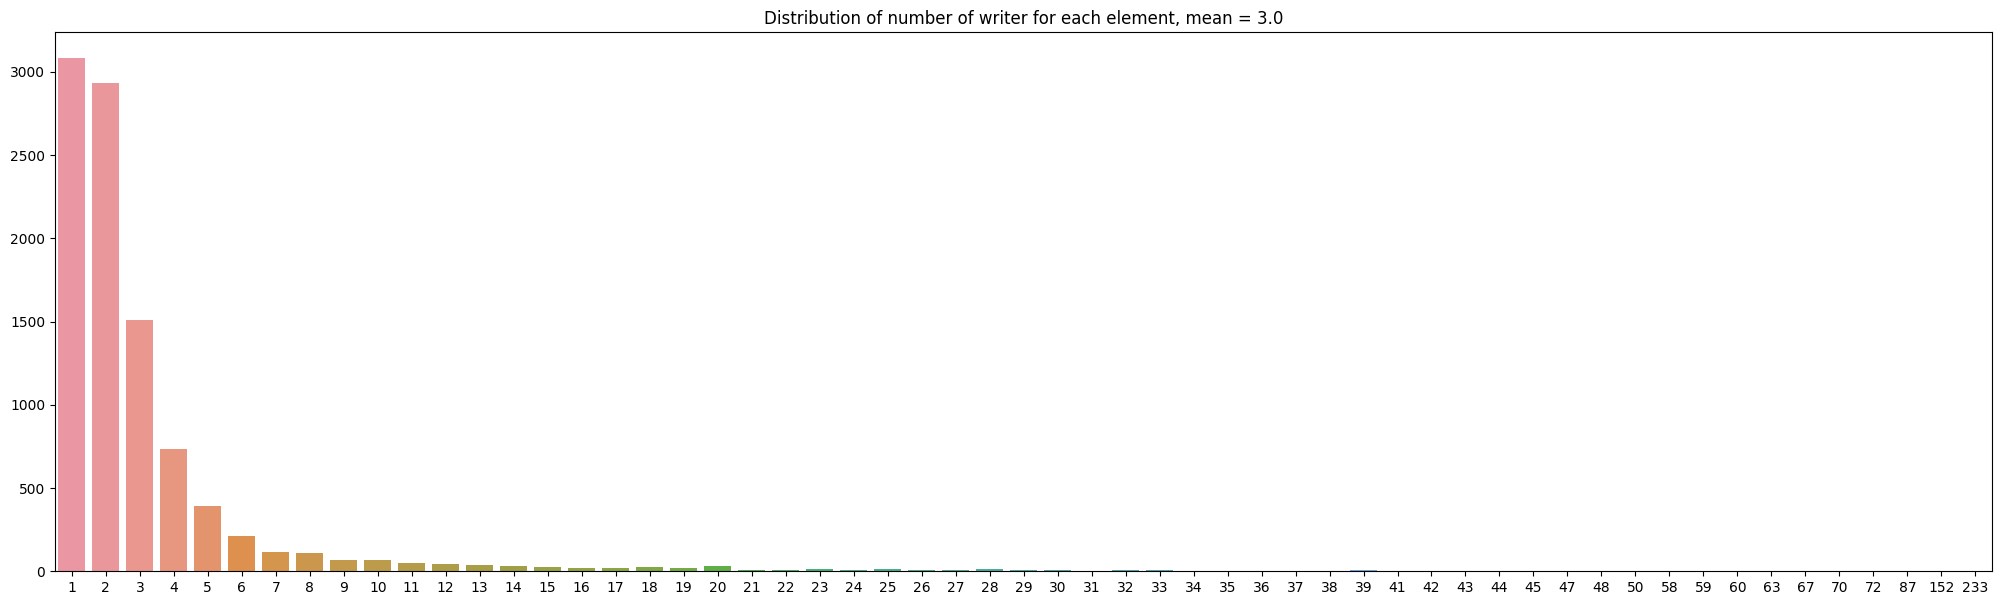

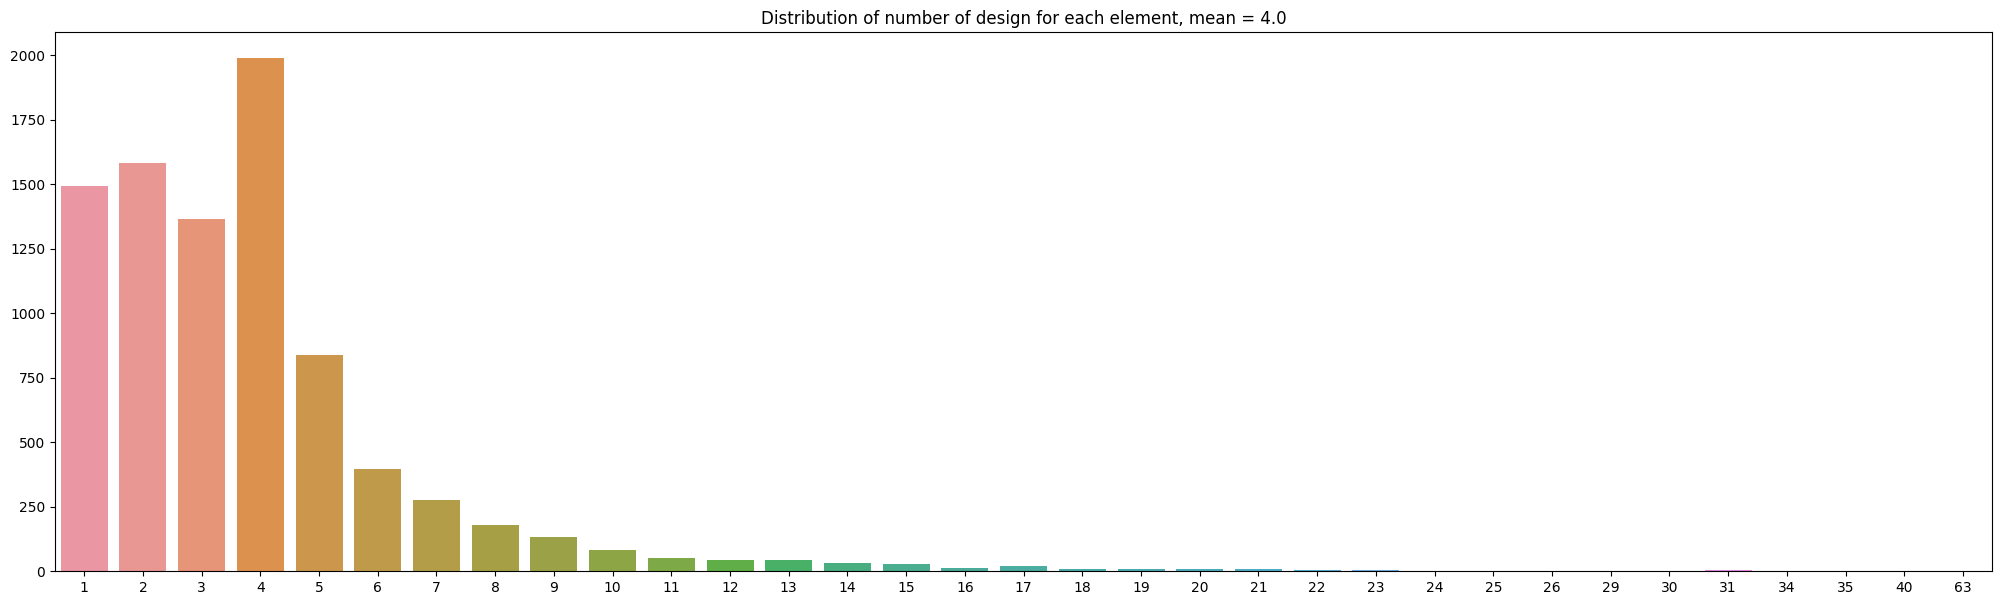

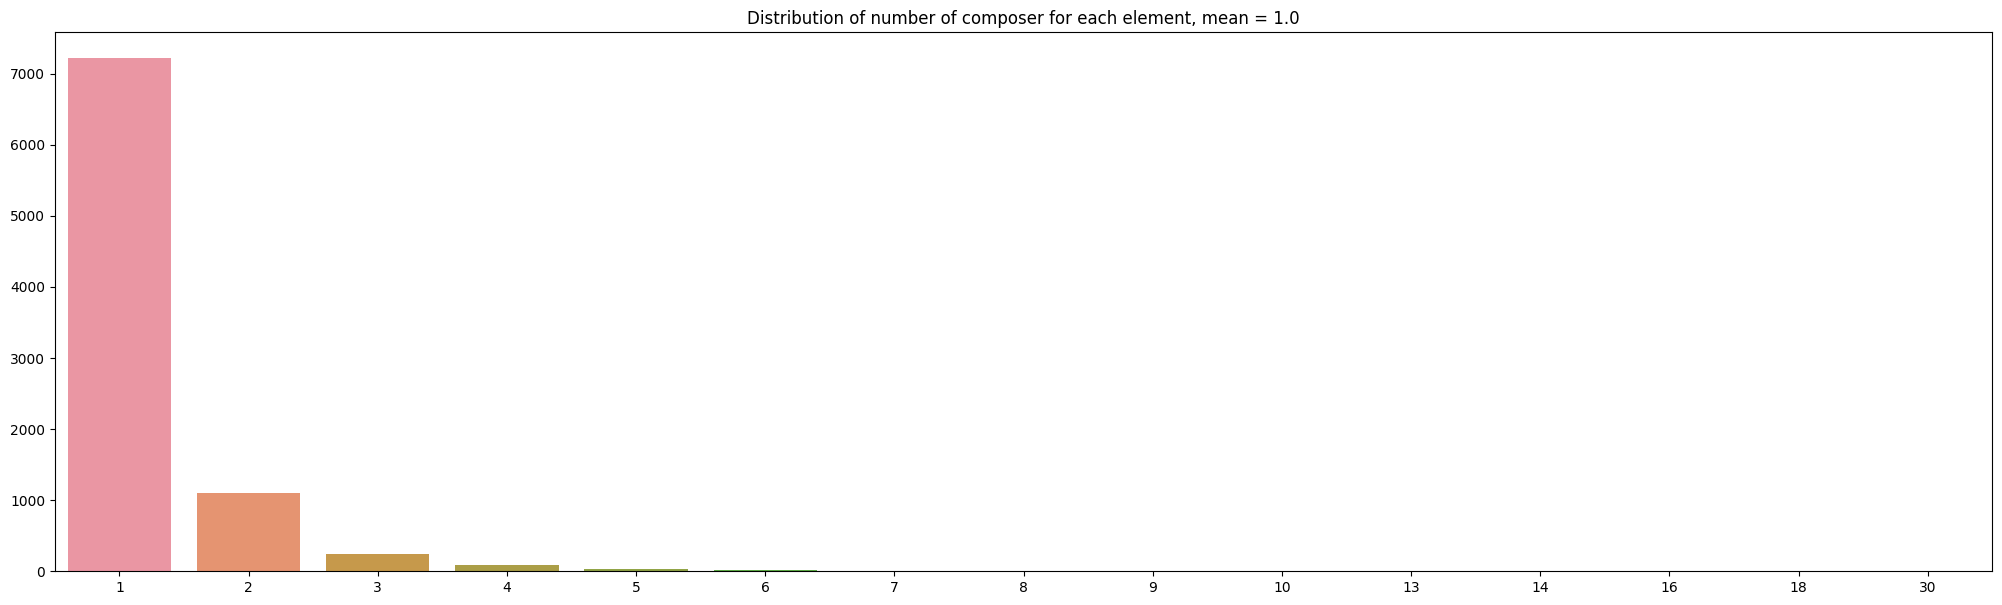

In [33]:
for f in ['actor', 'country', 'genre', 'director', 'editor', 'operator', 'producer', 'writer', 'design', 'composer']:
    genres_num = pd.Series([len(value) for value in df_kp[f].dropna()])
    bar_info = genres_num.value_counts().sort_values()

    plt.figure(figsize=(25, 7))
    plot_bar(bar_info, f'Distribution of number of {f} for each element, mean = {round(np.mean(genres_num), 0)}')

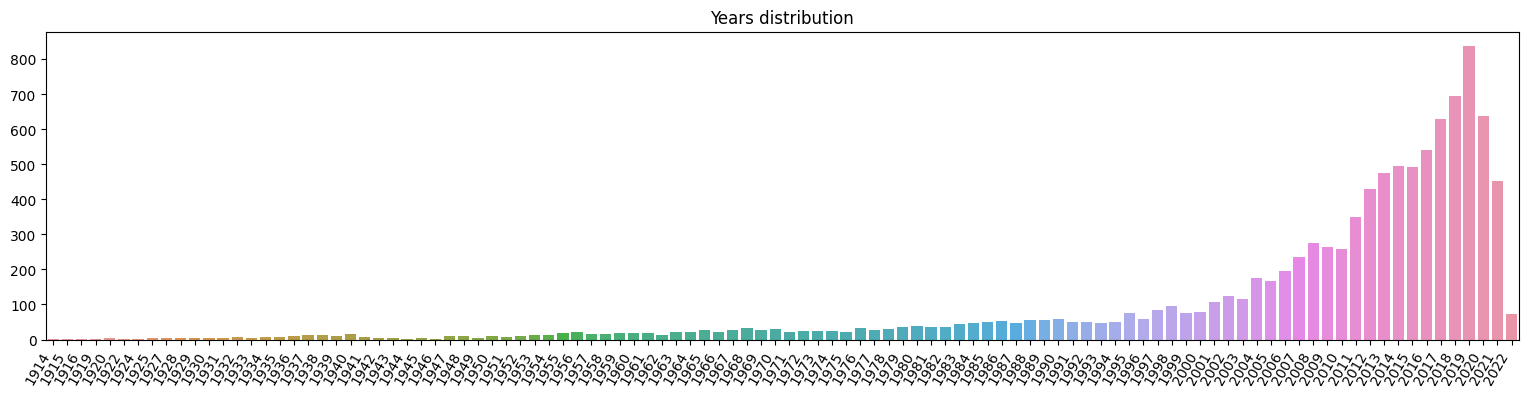

In [36]:
bar_info = df_kp['release_year'].astype(int).value_counts()
bar_info = [(i, v) for i, v in zip(bar_info.index, bar_info.values)]
bar_info = sorted(bar_info, key=lambda x: x[0])

plt.figure(figsize=(19, 4))
chart = sns.barplot(y=[v[1] for v in bar_info], x=[v[0] for v in bar_info])
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.title('Years distribution')
plt.show()

## Numeric

In [37]:
def plot_distribution(feature, title=''):
    plt.figure(figsize=(12, 3)) 
    sns.histplot(feature, kde=True, bins=100)
    plt.title(title)
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.boxplot(feature, orient='h')
    plt.show()

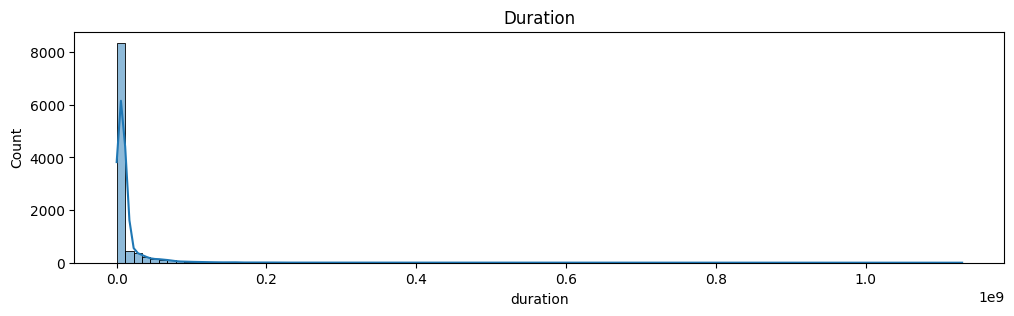

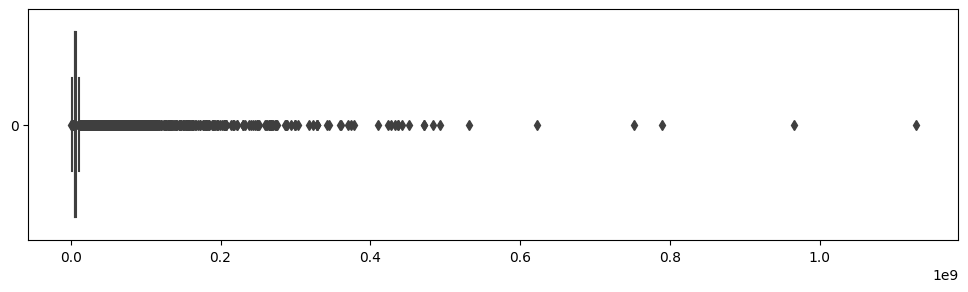

In [38]:
plot_distribution(df_kp['duration'], 'Duration')

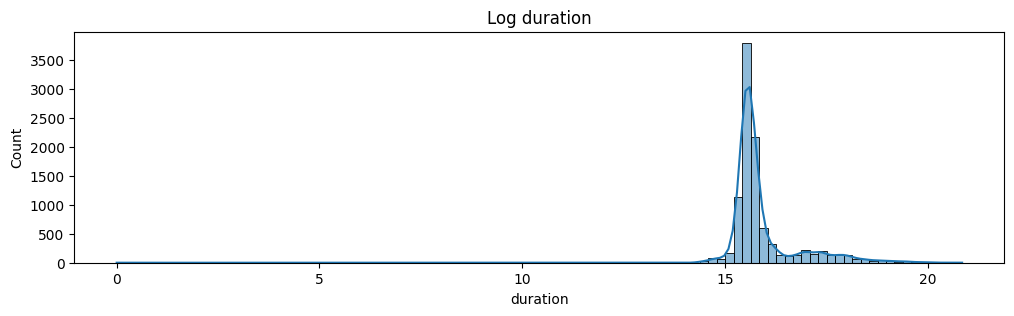

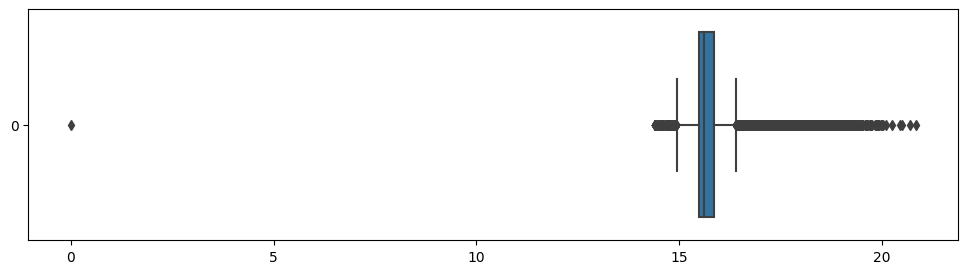

In [39]:
log_duration = df_kp['duration'].apply(lambda x: np.log1p(x))

plot_distribution(log_duration, 'Log duration')

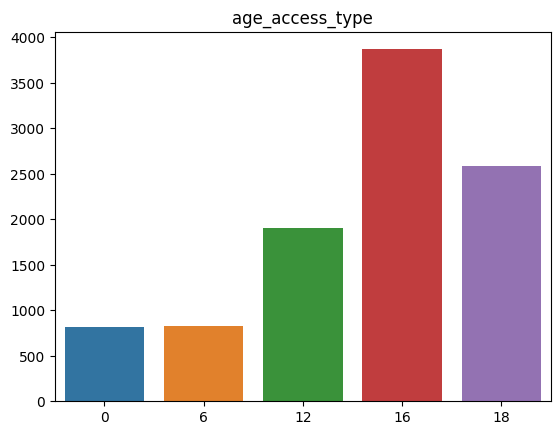

In [40]:
bar_info = df_kp['age_access_type'].value_counts()

plot_bar(bar_info, 'age_access_type')

## Multivariate

In [ ]:
df_kp.info()

In [ ]:
df_kp.columns

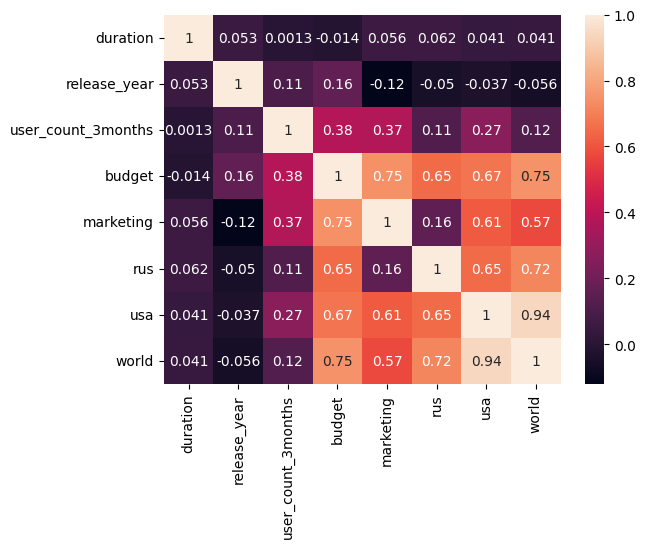

In [41]:
sns.heatmap(df_kp.corr(), annot=True)
plt.show()

# Preprocessing

In [150]:
df_kp.shape

(10017, 24)

In [151]:
df_kp.head()

,age_access_type,country,duration,availability,type,name,release_year,genre,user_count_3months,subscription_only,...,director,editor,operator,producer,writer,budget,marketing,rus,usa,world
0,12,[usa],6420000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,Звёздный путь 5: Последний рубеж,1989.0,"[Sci-Fi, Action, Thriller, Adventure]",6,False,...,[Уильям Шетнер],[Питер Е. Бергер],[Эндрю Ласло],"[Харви Беннетт, Брук Бретон, Мэл Эфрос, Джин Р...","[Джин Родденберри, Уильям Шетнер, Харви Беннет...",27800000.0,NaN,NaN,52210049.0,52210049.0
1,16,[usa],6780000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,Звёздный путь 6: Неоткрытая страна,1991.0,"[Sci-Fi, Action, Thriller, Adventure]",11,False,...,[Николас Мейер],"[Уильям Хой, Рональд Руз]",[Хиро Нарита],"[Стивен-Чарльз Джаффе, Ральф Уинтер, Брук Брет...","[Джин Родденберри, Леонард Нимой, Лоуренс Конн...",30000000.0,NaN,NaN,74888996.0,96888996.0
2,18,[usa],6000000.0,"[DTO, RENT, SUBSCRIPTION]",MOVIE,В поисках древнего артефакта,2019.0,[Horror],19,False,...,[Джаред Кон],NaN,NaN,"[Джаред Кон, Майкл Мейландер, Брайан Перера]",[Морис Хёрли],NaN,NaN,NaN,NaN,NaN
3,18,[usa],3780000.0,[SUBSCRIPTION],MOVIE,Прожарка Чарли Шина,2011.0,"[Comedy, Documentary]",1637,True,...,[Джоэл Галлен],NaN,NaN,"[Рик Остин, Марк Бёрг, Роб Кроуфорд, Джоэл Гал...","[Рэй Джеймс, Майкл Ферруччи, Крис МакГуайр, Фр...",NaN,NaN,NaN,NaN,NaN
4,18,[usa],3780000.0,[SUBSCRIPTION],MOVIE,Прожарка Уильяма Шэтнера,2006.0,[Comedy],322,True,...,[Джоэл Галлен],"[Билл ДеРонде, Наруми Инацугу]",NaN,"[Рик Остин, Роб Кроуфорд, Джоэл Галлен, Мишель...","[Майкл Ферруччи, Мэтью Харауиц, Джо Келли, Аар...",NaN,NaN,NaN,NaN,NaN


In [152]:
df_kp.columns

Index(['age_access_type', 'country', 'duration', 'availability', 'type',
       'name', 'release_year', 'genre', 'user_count_3months',
       'subscription_only', 'uid', 'actor', 'composer', 'design', 'director',
       'editor', 'operator', 'producer', 'writer', 'budget', 'marketing',
       'rus', 'usa', 'world'],
      dtype='object')

In [154]:
# mltpl_cat_features = ['actor', 'country', 'director', 'editor', 'operator', 'producer', 'writer', 'design', 'composer', 'genre']
# cat_feature_tfidf = 'genre'
# cat_features = ['availability']
# cat_features_raw = ['type', 'subscription_only']
# num_features = ['age_access_type', 'duration']
# skewed_num_features = ['duration', 'budget', 'marketing', 'rus',  'world']
# text_features = ['name']

skewed_num_features = ['duration', 'budget', 'marketing', 'rus',  'world']
mltpl_cat_features = ['actor', 'country', 'director', 'editor', 'operator', 'producer', 'writer', 'design', 'composer', 'genre']
mltpl_cat_n_top = {'actor': 10, 'country': 1, 'director': 1, 'editor': 1, 'producer': 5, 'writer': 2,
                  'operator': 1, 'design': 3, 'composer': 1, 'genre': 3}

class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
                text_features: list,
                cat_features: list,
                mltpl_cat_n_top: dict,
                cat_features_tfidf):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
        self.cat_features = cat_features
        self.cat_feature_tfidf = cat_features_tfidf
       # self.release_year_feature = release_year_feature
        
        self.tfidf = TfidfVectorizer(sublinear_tf=True, min_df=50,
                        ngram_range=(1, 1),
                                    tokenizer=lambda x: x.split(' '))
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df_pr), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                if isinstance(names, float):
                    continue
                    
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[[f'{col}_{i}' for i in range(768)]] = self.embed_model.encode(df_pr[col].values)
            df_pr.drop(col, axis=1, inplace=True)
        return df_pr
    
    def __get_unique_values(self, feature):
        unique_values = []
        for element in feature.dropna():
            unique_values.extend(element)
        return set(unique_values)
    
    def __preprocess_cat_features(self, df_pr):
        for col in self.cat_features:
            unique_values = self.__get_unique_values(df_pr[col])
            cats_df = pd.DataFrame(np.full((len(df_pr), len(unique_values)),
                                            0),
                                   columns=list(unique_values))
            
            for i, element in enumerate(df_pr[col]):
                if isinstance(element, float):
                    cats_df.loc[i, :] = 'Na'
                    continue
                for value in element:
                    cats_df.loc[i, value] = '1'
            df_pr.drop(col, axis=1, inplace=True)
            df_pr[cats_df.columns] = cats_df
        return df_pr  
    
    def __preprocess_cat_features_tfidf(self, df_pr):
        features = self.tfidf.transform(df_pr[self.cat_feature_tfidf].apply(lambda x : ' '.join(x))).toarray()
        df_pr[self.tfidf.get_feature_names()] = features

        return df_pr.drop(self.cat_feature_tfidf, axis=1)
    
    def fit(self, df):
        self.tfidf.fit(df[self.cat_feature_tfidf].apply(lambda x : ' '.join(x)))
    
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_cat_features(df_pr)
        # df_pr = self.__preprocess_cat_features_tfidf(df_pr)
        
        return df_pr

In [155]:
preprocesser = Preprocesser(mltpl_cat_features,
                            skewed_num_features,
                            text_features,
                            cat_features,
                            mltpl_cat_n_top,
                           cat_feature_tfidf)

In [156]:
df_modern = df_kp[df_kp['release_year'] >= 2000]
df_modern.reset_index(drop=True, inplace=True)
preprocesser.fit(df_modern)
df_pr = preprocesser.preprocess(df_modern)

df_pr['age_access_type'] = df_pr['age_access_type'].astype(str)
df_pr.rename(columns={'user_count_3months': 'target'}, inplace=True)

In [157]:
df_pr.columns

Index(['age_access_type', 'duration', 'availability', 'type', 'name',
       'release_year', 'target', 'subscription_only', 'uid', 'budget',
       'marketing', 'rus', 'usa', 'world', 'actor_0', 'actor_1', 'actor_2',
       'actor_3', 'actor_4', 'actor_5', 'actor_6', 'actor_7', 'actor_8',
       'actor_9', 'country_0', 'director_0', 'editor_0', 'operator_0',
       'producer_0', 'producer_1', 'producer_2', 'producer_3', 'producer_4',
       'writer_0', 'writer_1', 'design_0', 'design_1', 'design_2',
       'composer_0', 'genre_0', 'genre_1', 'genre_2'],
      dtype='object')

In [158]:
cat_features = ['age_access_type', 'type', 'actor_0', 'actor_1', 'actor_2',
               'actor_3', 'actor_4', 'actor_5', 'actor_6', 'actor_7', 'actor_8',
               'actor_9', 'country_0', 'director_0', 'editor_0', 'operator_0',
               'producer_0', 'producer_1', 'producer_2', 'producer_3', 'producer_4',
               'writer_0', 'writer_1', 'design_0', 'design_1', 'design_2',
               'composer_0', 'genre_0', 'genre_1', 'genre_2']
num_features = ['budget', 'marketing', 'rus', 'world', 'duration']
other = ['release_year', 'target', 'uid', 'name']

In [159]:
df_pr.head()

,age_access_type,duration,availability,type,name,release_year,target,subscription_only,uid,budget,...,producer_4,writer_0,writer_1,design_0,design_1,design_2,composer_0,genre_0,genre_1,genre_2
0,18,15.607270,"[DTO, RENT, SUBSCRIPTION]",MOVIE,В поисках древнего артефакта,2019.0,19,False,11ba66db-e941-4c3a-8da6-d8900e56f8c7,NaN,...,NaN,Морис Хёрли,NaN,Линдсей Моремен,Нина Чермак Розенберг,NaN,NaN,Horror,NaN,NaN
1,18,15.145235,[SUBSCRIPTION],MOVIE,Прожарка Чарли Шина,2011.0,1637,True,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,NaN,...,Роберт Марон,Рэй Джеймс,Майкл Ферруччи,Джон Кэлкинс,Ричард Шрайбер,NaN,NaN,Comedy,Documentary,NaN
2,18,15.145235,[SUBSCRIPTION],MOVIE,Прожарка Уильяма Шэтнера,2006.0,322,True,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,NaN,...,NaN,Майкл Ферруччи,Мэтью Харауиц,Джон Кэлкинс,Паула Элинс,NaN,NaN,Comedy,NaN,NaN
3,6,15.523889,[SUBSCRIPTION],MOVIE,Пламенное сердце,2022.0,71146,True,ba6bec1a-3aa9-48c7-aa65-908c21627a12,NaN,...,Жюльетт Фурнье,Лоран Зэйтун,Дженника Харпер,Флоран Масурель,NaN,NaN,Крис Иган,Comedy,Adventure,Family
4,12,15.384127,"[DTO, RENT]",MOVIE,Лесная братва,2006.0,3413,False,97192c07-5ad7-481f-a5e6-e81ec438d693,18.197537,...,Билл Дамашке,Лен Блум,Лорн Кэмерон,Кэти Алтери,Кристиан Шеллеуолд,Пол Шэрдлоу,Руперт Грегсон-Уильямс,Family,Cartoons,NaN


In [160]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8104 entries, 0 to 8103
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_access_type    8104 non-null   object 
 1   duration           8104 non-null   float64
 2   availability       7986 non-null   object 
 3   type               8104 non-null   object 
 4   name               8104 non-null   object 
 5   release_year       8104 non-null   float64
 6   target             8104 non-null   int64  
 7   subscription_only  8104 non-null   object 
 8   uid                8104 non-null   object 
 9   budget             2446 non-null   float64
 10  marketing          225 non-null    float64
 11  rus                3336 non-null   float64
 12  usa                2678 non-null   float64
 13  world              4165 non-null   float64
 14  actor_0            7913 non-null   object 
 15  actor_1            7818 non-null   object 
 16  actor_2            7756 

In [161]:
df_pr.isnull().sum()[df_pr.isnull().sum() > 1000]

budget        5658
marketing     7879
rus           4768
usa           5426
world         3939
editor_0      1469
operator_0    1284
producer_2    1382
producer_3    2069
producer_4    2736
writer_1      2860
design_0      1303
design_1      2360
design_2      3545
composer_0    1202
genre_1       2476
genre_2       5314
dtype: int64

In [163]:
df_pr[cat_features] = df_pr[cat_features].replace(np.nan, 'Na')

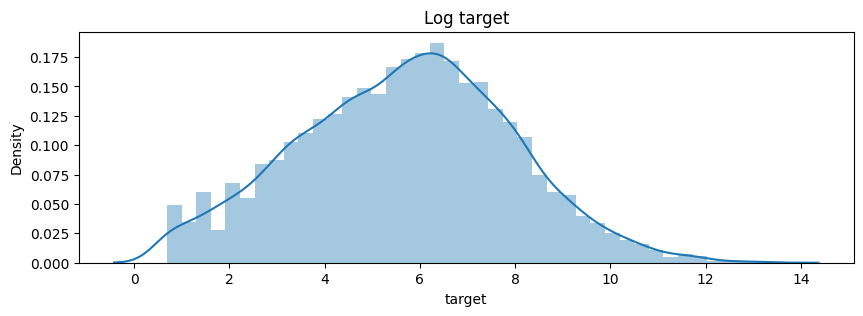

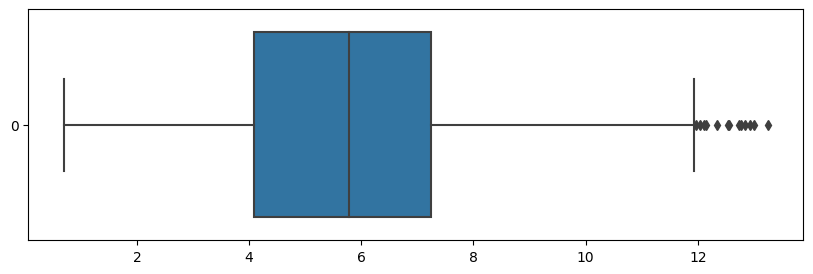

In [164]:
plt.figure(figsize=(10, 3))
sns.distplot(df_pr['target'].apply(lambda x: np.log1p(x)))
plt.title('Log target')
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['target'].apply(lambda x: np.log1p(x)), orient='h')
plt.show()

In [165]:
X, y = df_pr[cat_features+num_features], df_pr['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42, shuffle=True)

In [166]:
X_train.columns

Index(['age_access_type', 'type', 'actor_0', 'actor_1', 'actor_2', 'actor_3',
       'actor_4', 'actor_5', 'actor_6', 'actor_7', 'actor_8', 'actor_9',
       'country_0', 'director_0', 'editor_0', 'operator_0', 'producer_0',
       'producer_1', 'producer_2', 'producer_3', 'producer_4', 'writer_0',
       'writer_1', 'design_0', 'design_1', 'design_2', 'composer_0', 'genre_0',
       'genre_1', 'genre_2', 'budget', 'marketing', 'rus', 'world',
       'duration'],
      dtype='object')

In [167]:
df_pr

,age_access_type,duration,availability,type,name,release_year,target,subscription_only,uid,budget,...,producer_4,writer_0,writer_1,design_0,design_1,design_2,composer_0,genre_0,genre_1,genre_2
0,18,15.607270,"[DTO, RENT, SUBSCRIPTION]",MOVIE,В поисках древнего артефакта,2019.0,19,False,11ba66db-e941-4c3a-8da6-d8900e56f8c7,NaN,...,Na,Морис Хёрли,Na,Линдсей Моремен,Нина Чермак Розенберг,Na,Na,Horror,Na,Na
1,18,15.145235,[SUBSCRIPTION],MOVIE,Прожарка Чарли Шина,2011.0,1637,True,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,NaN,...,Роберт Марон,Рэй Джеймс,Майкл Ферруччи,Джон Кэлкинс,Ричард Шрайбер,Na,Na,Comedy,Documentary,Na
2,18,15.145235,[SUBSCRIPTION],MOVIE,Прожарка Уильяма Шэтнера,2006.0,322,True,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,NaN,...,Na,Майкл Ферруччи,Мэтью Харауиц,Джон Кэлкинс,Паула Элинс,Na,Na,Comedy,Na,Na
3,6,15.523889,[SUBSCRIPTION],MOVIE,Пламенное сердце,2022.0,71146,True,ba6bec1a-3aa9-48c7-aa65-908c21627a12,NaN,...,Жюльетт Фурнье,Лоран Зэйтун,Дженника Харпер,Флоран Масурель,Na,Na,Крис Иган,Comedy,Adventure,Family
4,12,15.384127,"[DTO, RENT]",MOVIE,Лесная братва,2006.0,3413,False,97192c07-5ad7-481f-a5e6-e81ec438d693,18.197537,...,Билл Дамашке,Лен Блум,Лорн Кэмерон,Кэти Алтери,Кристиан Шеллеуолд,Пол Шэрдлоу,Руперт Грегсон-Уильямс,Family,Cartoons,Na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,0,17.407328,[SUBSCRIPTION],SERIAL,Эрнест и Селестина,2017.0,1866,True,5a2ff001-afe5-45be-bebc-9abbc40320da,NaN,...,Na,Суэна Эро,Аньес Бидо,Na,Na,Na,Венсан Куртуа,Family,Cartoons,Na
8100,16,17.184185,[SUBSCRIPTION],SERIAL,"Мульт ""Кухня""",2017.0,39,True,29267cec-df59-4e0a-9304-106a1156cb5c,NaN,...,Na,Na,Na,Na,Na,Na,Юрий Мельничук,Comedy,Cartoons,Na
8101,12,16.320220,[SUBSCRIPTION],SERIAL,Без памяти,2021.0,14958,True,db608d74-b09e-4636-9ebc-0a21c7a9d8dd,NaN,...,Na,Константин Наумочкин,Сергей Соколов,Na,Na,Na,Валерий Царьков,Comedy,Melodrama,Na
8102,16,15.943742,"[SUBSCRIPTION, AVOD]",SERIAL,Всплеск любви,2015.0,2056,False,d505b747-5cb4-4ffd-b4bb-b037100f57ab,NaN,...,Na,Ким Джи-хён,Na,Na,Na,Na,Na,Melodrama,Fantasy,Na


In [168]:
df_pr = df_pr[cat_features+num_features+other]

In [169]:
df_pr.columns

Index(['age_access_type', 'type', 'actor_0', 'actor_1', 'actor_2', 'actor_3',
       'actor_4', 'actor_5', 'actor_6', 'actor_7', 'actor_8', 'actor_9',
       'country_0', 'director_0', 'editor_0', 'operator_0', 'producer_0',
       'producer_1', 'producer_2', 'producer_3', 'producer_4', 'writer_0',
       'writer_1', 'design_0', 'design_1', 'design_2', 'composer_0', 'genre_0',
       'genre_1', 'genre_2', 'budget', 'marketing', 'rus', 'world', 'duration',
       'release_year', 'target', 'uid', 'name'],
      dtype='object')

In [170]:
with open('/home/jovyan/work/cold_start_models/dataset_kp0.pkl', 'wb') as f:
    pickle.dump(df_pr, f)
    
# with open('/home/jovyan/work/cold_start_models/dataset_kp0.pkl', 'rb') as f:
#     df_pr = pickle.load(f)

# with open('/home/jovyan/work/cold_start_models/dataset_0.pkl', 'wb') as f:
#     pickle.dump(df_pr, f)

# with open('dataset_1.pkl', 'rb') as f:
#     df_pr = pickle.load(f)

# with open('item_coldstart_dataset_with_names.pkl', 'wb') as f:
    # pickle.dump(df_pr, f)

# with open('item_coldstart_dataset_with_names.pkl', 'rb') as f:
#     df_pr = pickle.load(f)